In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import torchvision
from torchvision.transforms import transforms as T
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
%matplotlib inline
import os
from tqdm.notebook import tqdm,trange
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_dir = "./data/plantvillage dataset/"
classes = os.listdir(data_dir+"color")
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [3]:
total_imgs = 0
for _ in classes:
    total_imgs += len(os.listdir(data_dir+"color/"+_))
print(f"Total images : {total_imgs}")

Total images : 54305


Text(0.5, 1.0, 'Class : Apple___Black_rot')

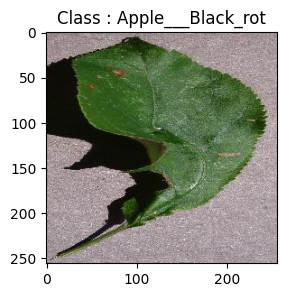

In [4]:
cl_ind = 1
im_ind = 0
im = mpimage.imread(data_dir+"color/"+classes[cl_ind]+"/"+(os.listdir(data_dir+"color/"+classes[cl_ind]))[im_ind])
plt.figure(figsize=(3,3))
plt.imshow(im)
plt.title(f"Class : {classes[cl_ind]}")

In [5]:
image_size = 200
batch_size = 128

In [6]:
transform = T.Compose([
    T.Resize((image_size,image_size)),
    T.ToTensor()
])

In [7]:
dataset = ImageFolder(data_dir+"color",transform=transform)
dataset

Dataset ImageFolder
    Number of datapoints: 54305
    Root location: ./data/plantvillage dataset/color
    StandardTransform
Transform: Compose(
               Resize(size=(200, 200), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [8]:
# torch.manual_seed(42)
# train_ds,test_ds = random_split(dataset,[40000,14305])

In [9]:
# train_dl = DataLoader(train_ds,batch_size=batch_size,shuffle=True)
# test_dl = DataLoader(test_ds,batch_size=batch_size,shuffle=False)
data_dl = DataLoader(dataset,batch_size=batch_size,shuffle=True)

In [10]:
im = None
for im,lb in data_dl:
    im = im
    print(im.size())
    break

torch.Size([128, 3, 200, 200])


In [11]:
class plantvillage(nn.Module):
    def __init__(self):
        super().__init__()
        self.NeuralNetwork = nn.Sequential(
            
            nn.Conv2d(3,32,kernel_size=3,stride=1,padding=1), # batch_size * 32 * 200 * 200
            nn.ReLU(),
            nn.MaxPool2d(2,2), # batch_size * 32 * 100 * 100
        
            nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1), # batch_size * 64 * 100 * 100
            nn.ReLU(),
            nn.MaxPool2d(2,2), # batch_size * 64 * 50 * 50
        
            nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1), # batch_size * 128 * 50 * 50
            nn.ReLU(),
            nn.MaxPool2d(2,2), # batch_size * 128 * 25 * 25
        
            nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1), # batch_size * 128 * 25 * 25
            nn.ReLU(),
            nn.MaxPool2d(2,2), # batch_size * 128 * 12 * 12
        
            nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1), # batch_size * 256 * 12 * 12
            nn.ReLU(),
            nn.MaxPool2d(2,2), # batch_size * 256 * 6 * 6

            nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1), # batch_size * 256 * 6 * 6
            nn.ReLU(),
            nn.MaxPool2d(2,2), # batch_size * 256 * 3 * 3
        
            nn.Flatten(),
            nn.Linear(256*3*3,512),
            nn.Linear(512,38)
        )

    def forward(self,x):
        return self.NeuralNetwork(x)

In [12]:
x= torch.randn(128,3,150,150)
model = plantvillage()
model(im).size()

torch.Size([128, 38])

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
model = model.to(device)
model

plantvillage(
  (NeuralNetwork): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(

In [15]:
criterion = F.cross_entropy
optimizer = Adam(model.parameters(),lr=0.001)

In [16]:
import copy

class EarlyStopping():
    def __init__(self,patience=5,min_delta=0,restore_best_weights=True):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_model = None
        self.best_loss = None
        self.counter = 0
        self.status = ""

    def __call__(self,model,val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model = copy.deepcopy(model.state_dict())
        elif self.best_loss - val_loss >= self.min_delta:
            self.best_model = copy.deepcopy(model.state_dict())
            self.best_loss = val_loss
            self.counter = 0
            self.status = f"Improvement found, counter reset to {self.counter}"
        else:
            self.counter += 1
            self.status = f"No improvement in tha last {self.counter} epochs"
            if self.counter >= self.patience:
                self.status = f"Early stopping triggered after {self.counter} epochs."
                if self.restore_best_weights:
                    model.load_state_dict(self.best_model)
                return True
        return False

In [17]:
# img , lbl = None,None
# for i,l in test_dl:
#     img,lbl = i,l
#     break

In [18]:
# %%time
# epoch = 0
# done = False
# es = EarlyStopping()
# while epoch < 100 and not done:
#     epoch += 1
#     steps = list(enumerate(train_dl))
#     model.train()
#     for i, imgs,lbls in enumerate(train_dl):
#         imgs,lbls = imgs.to(device),lbls.to(device)
#         output = model(imgs)
#         loss = criterion(output,lbls)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         if i == len(steps)-1:
#             model.eval()
#             pred = model(img.to(device))
#             vloss = F.cross_entropy(pred,lbl.to(device))
#             if es(model,vloss):
#                 done = True
#             print(f"Epoch: {epoch}, tloss: {loss.item()}, vloss: {vloss:.4f}, {es.status}")
#         else:
#             print(f"Epoch: {epoch}, tloss: {loss.item()}")

In [19]:
train_loss = 0

In [ ]:
%%time
pbar = trange(0,10,leave=False,desc="Epoch")
for epoch in pbar:
    # pbar = tqdm(data_dl,desc="Training")
    model.train()    
    pbar.set_postfix_str('Loss: %.4f' % (train_loss/len(data_dl)))
    train_loss = 0
    for imgs,lbls in tqdm(data_dl,leave=False, desc="Training"):
        imgs,lbls = imgs.to(device),lbls.to(device)
        output = model(imgs)
        loss = criterion(output,lbls)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    

In [25]:
torch.save(model.state_dict(),"PlantVillageModel.pth")

In [35]:
model.load_state_dict(torch.load('PlantVillageModel.pth'))

<All keys matched successfully>

In [41]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for im,lb in data_dl:
        im,lb = im.to(device),lb.to(device)
        out = model(im)
        _,pred = torch.max(out.data,1)
        correct += (pred == lb).sum().item()
        total += lb.size(0)
accuracy = 100 * correct/total
print(f"{correct}/{total}, acc : {accuracy}")

52854/54305, acc : 97.32805450695147


Original : Cherry_(including_sour)___Powdery_mildew  Predict : Cherry_(including_sour)___Powdery_mildew


torch.Size([3, 200, 200])

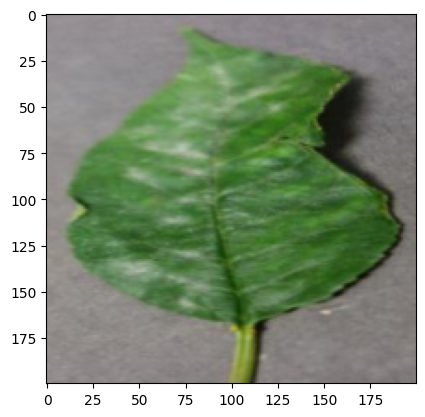

In [63]:
ind = 50000
im,lb = dataset[ind]
out = model(im.unsqueeze(0).to(device))
_,pred = torch.max(out.data,1)
plt.imshow(im.permute(1,2,0))
print(f"Original : {dataset.classes[lb]}  Predict : {dataset.classes[pred[0].item()]}")
im.size()

In [85]:
torch.cuda.empty_cache()